#***Exploración y preprocesamiento de datos – Parcial 3***
----
>**Author:**
* Daniela Pinzon

#***PARTE I (25 puntos)***
> - Utilizando el dataset de Bank realizar los siguientes pasos:
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


##***Bank Marketing Data Set***
----
>**1.**  Crear transformación de imputación para cada uno de los tipos de variables.

----
> **Imputacion:**
>- Si no hay valores null en el DataFrame como en este caso, no es necesario realizar la imputación de valores faltantes.
>- La imputación se realiza cuando existen valores faltantes en el conjunto de datos y se desea asignar valores a esos campos vacíos.
>- En este caso se segmentaron las columnas por tipo de datos y se realizo la imputacion la cual no realizo ningun cambio

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder ,RobustScaler
from sklearn.compose import ColumnTransformer
import joblib

In [ ]:
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# Obtener los tipos de datos de cada columna
dtypes = df.dtypes

In [ ]:
# Separar las columnas por tipo de dato
float_cols = dtypes[dtypes == 'float'].index.tolist()
int_cols = dtypes[dtypes == 'int'].index.tolist()
object_cols = dtypes[dtypes == 'object'].index.tolist()

In [ ]:
df[float_cols]

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...
41183,-1.1,94.767,-50.8,1.028,4963.6
41184,-1.1,94.767,-50.8,1.028,4963.6
41185,-1.1,94.767,-50.8,1.028,4963.6
41186,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
df[int_cols]

,age,duration,campaign,pdays,previous
0,56,261,1,999,0
1,57,149,1,999,0
2,37,226,1,999,0
3,40,151,1,999,0
4,56,307,1,999,0
...,...,...,...,...,...
41183,73,334,1,999,0
41184,46,383,1,999,0
41185,56,189,2,999,0
41186,44,442,1,999,0


In [ ]:
df[object_cols]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


###***Sklearn Simple Impute***
----

In [ ]:
# Imputación para variables de tipo float
imputer_float = SimpleImputer(strategy='mean')
df[float_cols] = imputer_float.fit_transform(df[float_cols])

# Imputación para variables de tipo int
imputer_int = SimpleImputer(strategy='most_frequent')
df[int_cols] = imputer_int.fit_transform(df[int_cols])

# Imputación para variables de tipo object
imputer_object = SimpleImputer(strategy='most_frequent')
df[object_cols] = imputer_object.fit_transform(df[object_cols])

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


>**2.**  Probar los respectivos escalados en los datos numéricos **(maxMin,Standard, Robust)**
----
> **Escalado MinMax :**
>- El escalado min max es el mas adecuado puesto a que no tiende a dar datos negativos en el escalado del df con columnas numericasa (int , float)

In [ ]:
# Variables numéricas
numeric_cols = df.select_dtypes(include=['float', 'int']).columns.tolist()

In [ ]:
numeric_cols = df[numeric_cols]

In [ ]:
numeric_cols

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
# Crear un objeto de escalado Max-Min
scaler_maxmin = MinMaxScaler()

In [ ]:
# Escalar los datos utilizando Max-Min
df_maxmin = scaler_maxmin.fit_transform(numeric_cols)
df_maxmin = pd.DataFrame(df_maxmin, columns=numeric_cols.columns)

In [ ]:
# Imprimir los DataFrames escalados
print("Datos escalados con Max-Min:")
df_maxmin

Datos escalados con Max-Min:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41184,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41185,0.481481,0.038430,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41186,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000


In [ ]:
# Crear un objeto de escalador Standard
scaler_standard = StandardScaler()

In [ ]:
# Escalar los datos utilizando Standard
df_standard = scaler_standard.fit_transform(numeric_cols)
df_standard = pd.DataFrame(df_standard, columns=numeric_cols.columns)

In [ ]:
print("\nDatos escalados con Standard:")
df_standard


Datos escalados con Standard:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,0.573445,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41185,1.533034,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41186,0.381527,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697


In [ ]:
# Crear un objeto de escalador Robust
scaler_robust = RobustScaler()

In [ ]:
# Escalar los datos utilizando Robust
df_robust = scaler_robust.fit_transform(numeric_cols)
df_robust = pd.DataFrame(df_robust, columns=numeric_cols.columns)

In [ ]:
print("\nDatos escalados con Robust:")
df_robust


Datos escalados con Robust:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.200000,0.373272,-0.5,0.0,0.0,0.0000,0.266594,0.857143,0.000000,0.000000
1,1.266667,-0.142857,-0.5,0.0,0.0,0.0000,0.266594,0.857143,0.000000,0.000000
2,-0.066667,0.211982,-0.5,0.0,0.0,0.0000,0.266594,0.857143,0.000000,0.000000
3,0.133333,-0.133641,-0.5,0.0,0.0,0.0000,0.266594,0.857143,0.000000,0.000000
4,1.200000,0.585253,-0.5,0.0,0.0,0.0000,0.266594,0.857143,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
41183,2.333333,0.709677,-0.5,0.0,0.0,-0.6875,1.107726,-1.428571,-1.058612,-1.762791
41184,0.533333,0.935484,-0.5,0.0,0.0,-0.6875,1.107726,-1.428571,-1.058612,-1.762791
41185,1.200000,0.041475,0.0,0.0,0.0,-0.6875,1.107726,-1.428571,-1.058612,-1.762791
41186,0.400000,1.207373,-0.5,0.0,0.0,-0.6875,1.107726,-1.428571,-1.058612,-1.762791


>**3.**  Determinar la mejor transformación categórica **(onehot vs ordinal)**
----
>**Transformación One-Hot:**

>- La transformación One-Hot crea una nueva columna binaria para cada categoría en tu variable categórica.
>- Cada columna binaria representa la presencia o ausencia de una categoría en particular.
>- Es útil cuando las categorías no tienen un orden inherente y son independientes entre sí como en este df.
>- Funciona bien cuando hay un número limitado de categorías y cuando las categorías no tienen una relación de ordenamiento.

In [ ]:
# Variables categoricas
object_cols = df[object_cols]

In [ ]:
object_cols

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [ ]:
object_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  y            41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


In [ ]:
# Combinacion de transformadores es una clase porque piensa en mayusculas
columnTransformer = ColumnTransformer(
    [
        # nombre , clase (constructor),arreglo
        # One-Hot Encoding : Es una técnica utilizada para convertir variables categóricas en una representación numérica binaria.
        # Cada categoría se convierte en una nueva columna binaria (0 o 1), y se le asigna un valor de 1 en la columna correspondiente
        # si la muestra pertenece a esa categoría, y un valor de 0 en las demás columnas.
       ('OneHot',OneHotEncoder(sparse = False),[3,4,5,6,7,8,9,10]),
        # Ordinal Encoding : Es una técnica utilizada para codificar variables categóricas en forma de enteros ordinales,
        # donde las categorías se asignan a enteros numéricos en función de su orden o jerarquía.
       ('Ordinal',OrdinalEncoder(),[0,1,2])
    ]
)

In [ ]:
columnTransformer.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('OneHot', OneHotEncoder(sparse=False),
                                 [3, 4, 5, 6, 7, 8, 9, 10]),
                                ('Ordinal', OrdinalEncoder(), [0, 1, 2])])

In [ ]:
col_trans = columnTransformer.transform(df)

In [ ]:
col_trans

array([[ 1.,  0.,  0., ..., 39.,  3.,  1.],
       [ 0.,  0.,  0., ..., 40.,  7.,  1.],
       [ 0.,  0.,  0., ..., 20.,  7.,  1.],
       ...,
       [ 0.,  0.,  0., ..., 39.,  5.,  1.],
       [ 0.,  0.,  0., ..., 27.,  9.,  1.],
       [ 0.,  0.,  0., ..., 57.,  5.,  1.]])

>**4.**  Hacer la distribución de las variables numéricas más Gaussianas.

###***Box-Cox***
----

In [ ]:
from scipy.stats import skewnorm
from scipy.stats import boxcox
from scipy.special import boxcox
from scipy import stats
from sklearn.preprocessing import PowerTransformer

In [ ]:
numeric_cols

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
# Aplicar la función abs() al DataFrame
df_abs = numeric_cols.abs()

In [ ]:
df_abs

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,1.1,94.767,50.8,1.028,4963.6
41184,46,383,1,999,0,1.1,94.767,50.8,1.028,4963.6
41185,56,189,2,999,0,1.1,94.767,50.8,1.028,4963.6
41186,44,442,1,999,0,1.1,94.767,50.8,1.028,4963.6


In [ ]:
# Metodo perform a box-cox
pt_box = PowerTransformer(method='box-cox', standardize= False)

In [ ]:
pt_box.fit(df_abs+1)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:933: RuntimeWarning: overflow encountered in power
  variance = np.var(data**lmb / lmb, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:246: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


PowerTransformer(method='box-cox', standardize=False)

In [ ]:
pt_box_trans = pt_box.transform(df_abs + 1)

In [ ]:
pt_box_trans

array([[2.65694081e+000, 8.04881725e+000, 4.69808969e-001, ...,
        7.24067933e+002, 1.75905723e+001, 1.63073589e+152],
       [2.66394267e+000, 6.96771305e+000, 4.69808969e-001, ...,
        7.24067933e+002, 1.75905723e+001, 1.63073589e+152],
       [2.48570603e+000, 7.76360738e+000, 4.69808969e-001, ...,
        7.24067933e+002, 1.75905723e+001, 1.63073589e+152],
       ...,
       [2.65694081e+000, 7.41675391e+000, 6.08861310e-001, ...,
        1.39457325e+003, 1.58467918e+000, 2.55305361e+151],
       [2.55900938e+000, 9.13828068e+000, 4.69808969e-001, ...,
        1.39457325e+003, 1.58467918e+000, 2.55305361e+151],
       [2.76430199e+000, 7.87376470e+000, 6.73505183e-001, ...,
        1.39457325e+003, 1.58467918e+000, 2.55305361e+151]])

<Axes: ylabel='Count'>

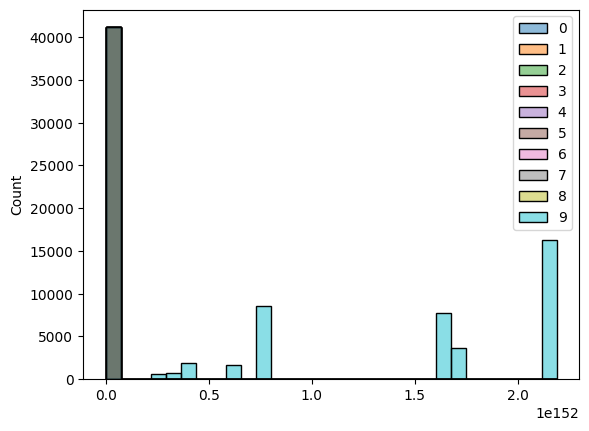

In [ ]:
sns.histplot(pt_box_trans, bins = 30)

###***Yeo-Johnson***
----

In [ ]:
pt = PowerTransformer(standardize= False)

In [ ]:
pt.fit(numeric_cols)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:246: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


PowerTransformer(standardize=False)

In [ ]:
pt_trans = pt.transform(numeric_cols)

In [ ]:
# Se genera distribucion de power transformer
pt_trans

array([[ 2.65694107e+000,  8.04881725e+000,  4.69808969e-001, ...,
        -7.24067748e+002,  1.75905723e+001,  1.63074455e+152],
       [ 2.66394293e+000,  6.96771305e+000,  4.69808969e-001, ...,
        -7.24067748e+002,  1.75905723e+001,  1.63074455e+152],
       [ 2.48570625e+000,  7.76360738e+000,  4.69808969e-001, ...,
        -7.24067748e+002,  1.75905723e+001,  1.63074455e+152],
       ...,
       [ 2.65694107e+000,  7.41675391e+000,  6.08861310e-001, ...,
        -1.39457286e+003,  1.58467918e+000,  2.55306710e+151],
       [ 2.55900962e+000,  9.13828068e+000,  4.69808969e-001, ...,
        -1.39457286e+003,  1.58467918e+000,  2.55306710e+151],
       [ 2.76430228e+000,  7.87376470e+000,  6.73505183e-001, ...,
        -1.39457286e+003,  1.58467918e+000,  2.55306710e+151]])

<Axes: ylabel='Count'>

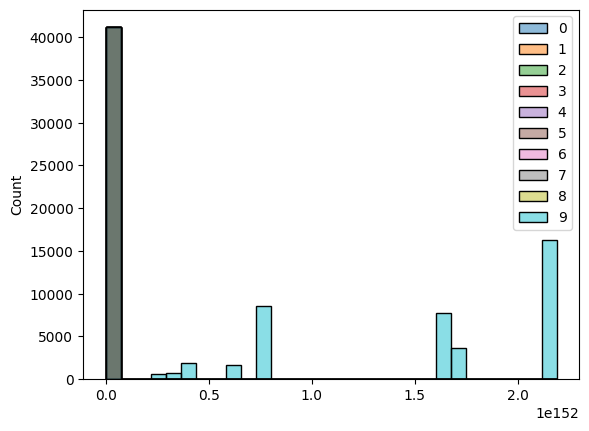

In [ ]:
# Histograma de la nueva distribucion
sns.histplot(pt_trans ,bins=30)

>**5.**  Crear un pipeline Numérico y otro Categórico. Unir ambos en un solo pipeline usando ColumnTransformer.

###***Pipeline***
----

In [ ]:
# Crear el pipeline numérico
pipeline_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Manejo de valores faltantes
    ('scaler', MinMaxScaler()) # Escalado de características numéricas
])

In [ ]:
# Crear el pipeline categórico
pipeline_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

In [ ]:
col_num = [0,10,11,12,13,15,16,17,18,19]
col_cat = [1,2,3,4,5,6,7,8,9,14,20]

In [ ]:
# Unimos los pipelines usando column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pipeline_num, col_num),
        ('cat', pipeline_cat, col_cat)
    ])

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 [0, 10, 11, 12, 13, 15, 16, 17, 18, 19]),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 [1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 20])])

In [ ]:
tm_df = preprocessor.fit_transform(df)

In [ ]:
tm_df

array([[0.48148148, 0.05307035, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.49382716, 0.03029687, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.24691358, 0.04595364, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.48148148, 0.03843026, 0.01818182, ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.08987393, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.7037037 , 0.04859699, 0.03636364, ..., 0.        , 1.        ,
        0.        ]])

>**6.** Seleccionar variables más importantes y eliminar las restantes en el pipeline.

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df_l = df.drop(['default','housing','previous','y','cons.conf.idx','pdays' ,'day_of_week','poutcome','cons.price.idx','euribor3m','nr.employed','emp.var.rate'] , axis = 1)

In [ ]:
df_l

,age,job,marital,education,loan,contact,month,duration,campaign
0,56,housemaid,married,basic.4y,no,telephone,may,261,1
1,57,services,married,high.school,no,telephone,may,149,1
2,37,services,married,high.school,no,telephone,may,226,1
3,40,admin.,married,basic.6y,no,telephone,may,151,1
4,56,services,married,high.school,yes,telephone,may,307,1
...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,cellular,nov,334,1
41184,46,blue-collar,married,professional.course,no,cellular,nov,383,1
41185,56,retired,married,university.degree,no,cellular,nov,189,2
41186,44,technician,married,professional.course,no,cellular,nov,442,1


>**7.** Guardar el pipeline como joblib.

###***Pipeline - Dump***
----

In [ ]:
joblib.dump(pipeline, "pipeline_1.joblib")

['pipeline_1.joblib']

>**8.** Cargar el pipeline y probarlo con un dato de entrada.

###***Pipeline - Joblib-load***
----

In [ ]:
pipeline = joblib.load('pipeline_1.joblib')

In [ ]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  [0, 10, 11, 12, 13, 15, 16,
                                                   17, 18, 19]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   14, 20])]))])

In [ ]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   loan       41188 non-null  object
 5   contact    41188 non-null  object
 6   month      41188 non-null  object
 7   duration   41188 non-null  int64 
 8   campaign   41188 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.8+ MB


In [ ]:
# Definimos los datos de prueba del df_l como datos de entrada
col_num = [0,7,8]
col_cat = [1,2,3,4,5,6]

In [ ]:
# Unimos los pipelines usando column Transformer
pipeline = ColumnTransformer(
    transformers=[
        ('num', pipeline_num, col_num),
        ('cat', pipeline_cat, col_cat)
    ])

In [ ]:
pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 [0, 7, 8]),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 [1, 2, 3, 4, 5, 6])])

In [ ]:
# Usamos esos datos de entrada para usar el pipeline
tm_df = pipeline.fit_transform(df_l)

In [ ]:
tm_df

<41188x42 sparse matrix of type '<class 'numpy.float64'>'
	with 353041 stored elements in Compressed Sparse Row format>

#***PARTE II (25 puntos)***
>- Usando el data set de hungary_chickenpox_data(casos de viruela), crear una serie de tiempo con los casos de viruela de Budapest.
>- UCI Machine Learning Repository: Hungarian Chickenpox Cases Data Set
>- https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases




##***Hungary Chickenpox Data Set***
----
>**1.**  Dibujar la serie

In [ ]:
# Cargar los datos desde el archivo CSV
ts = pd.read_csv('/content/hungary_chickenpox.csv',index_col = 0 , parse_dates = True)

<ipython-input-857-29b450f0dc4e>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ts = pd.read_csv('/content/hungary_chickenpox.csv',index_col = 0 , parse_dates = True)


In [ ]:
ts

,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
Date,,,,,,,,,,,,,,,,,,,,
2005-03-01,168,79,30,173,169,42,136,120,162,36,130,57,2,178,66,64,11,29,87,68
2005-10-01,157,60,30,92,200,53,51,70,84,28,80,50,29,141,48,29,58,53,68,26
2005-01-17,96,44,31,86,93,30,93,84,191,51,64,46,4,157,33,33,24,18,62,44
2005-01-24,163,49,43,126,46,39,52,114,107,42,63,54,14,107,66,50,25,21,43,31
2005-01-31,122,78,53,87,103,34,95,131,172,40,61,49,11,124,63,56,7,47,85,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-12,95,12,41,6,39,0,16,15,14,10,56,7,13,122,4,23,4,11,110,10
2014-08-12,43,39,31,10,34,3,2,30,25,19,34,20,18,70,36,5,23,22,63,9
2014-12-15,35,7,15,0,0,0,7,7,4,2,30,36,4,72,5,21,14,0,17,10


In [ ]:
ts = ts[['BUDAPEST']]

In [ ]:
ts

,BUDAPEST
Date,
2005-03-01,168
2005-10-01,157
2005-01-17,96
2005-01-24,163
2005-01-31,122
...,...
2014-01-12,95
2014-08-12,43
2014-12-15,35


<Axes: xlabel='Date'>

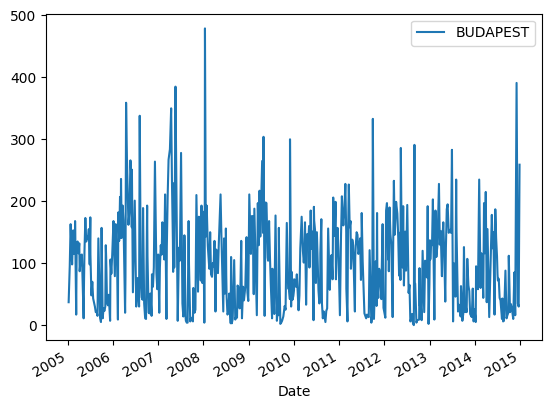

In [ ]:
ts.plot()

>**2.** Dibujar  Histogramas por año

In [ ]:
# Obtener los años únicos en la serie de tiempo
years = ts.index.year.unique()

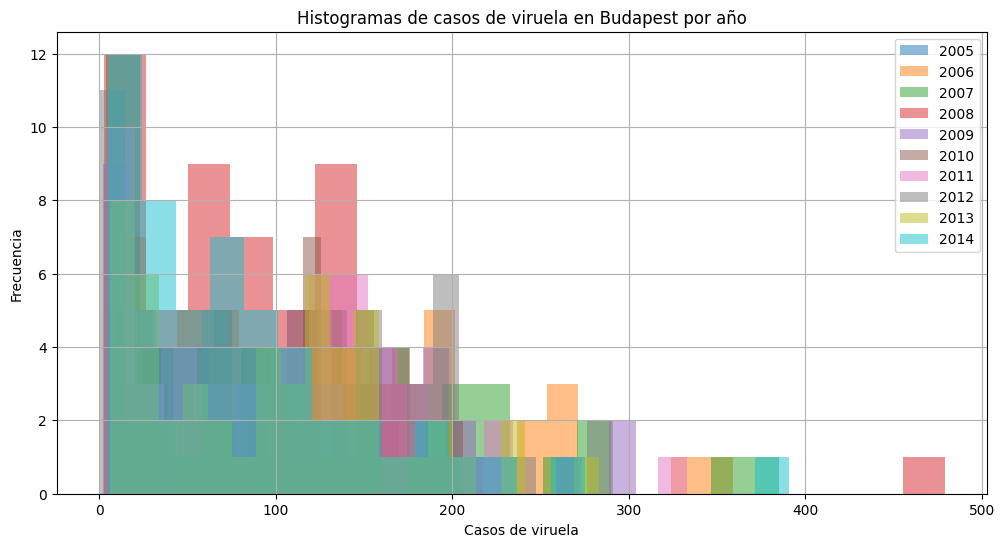

In [ ]:
# Crear un histograma por año
plt.figure(figsize=(12, 6))
for year in years:
    year_data = ts[ts.index.year == year]
    plt.hist(year_data, bins=20, alpha=0.5, label=str(year))

plt.title('Histogramas de casos de viruela en Budapest por año')
plt.xlabel('Casos de viruela')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

>**3.** Dibujar  Diagrama de Cajas por año

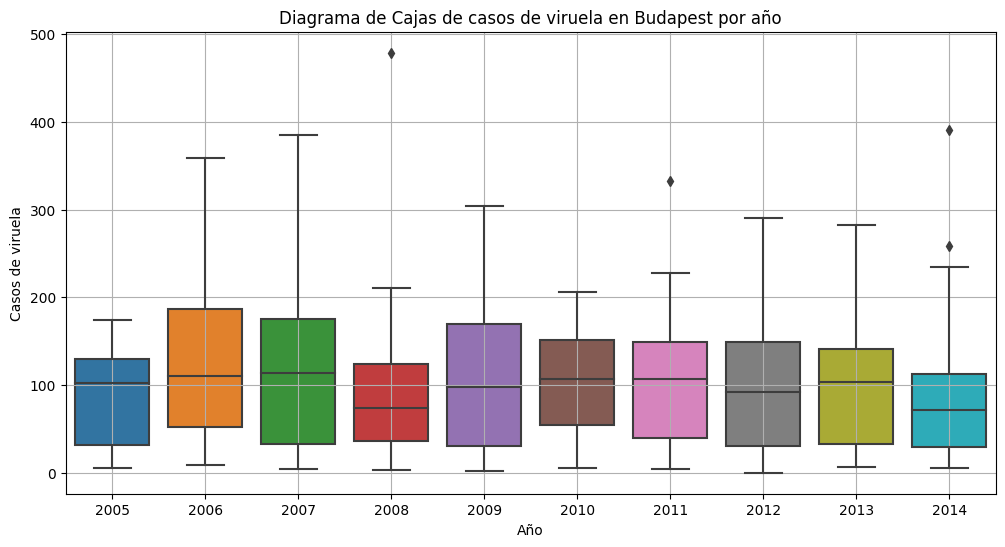

In [ ]:
# Crear un DataFrame a partir de la serie de tiempo
df = pd.DataFrame({'year': ts.index.year, 'cases': ts.values.flatten()})

# Utilizar la función boxplot de Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='cases', data=df)
plt.title('Diagrama de Cajas de casos de viruela en Budapest por año')
plt.xlabel('Año')
plt.ylabel('Casos de viruela')
plt.grid(True)
plt.show()

>**4.** Realizar un análisis de los resultados
----
>- Podemos afirmar que durante 2007 hubo mas casos de contagio de viruela segun el diagrama de cajas.
>- Sin embargo por medio del histograma podemos afirmar que estos casos se confirmaron con mayor precuenta en 2005, 2007 y 2008 , siendo en 2009 el siguiente pico de contagion mas alto
>- Se pueden evidenciar por otro lado que hubieron casos atipicos (out-layers) durante 2008 , 2011 y 2014 , siendo el 2014 con mas datos atipicos y 2008 con el caso atipico mas alto
>- Por otro lado podemos afirmar que la media entre 2005 y finales de 2014 data en un promedio de 100 contagios por año como se evidencia en el diagrama de cajas

>**5.** Determinar si la serie es White Noise **(revisar media, varianza  y auto correlaciones)**
----
>- **No es una serie de ruido blanco**
>- La serie de tiempo muestra una tendencia ascendente o descendente significativa, esto sugiere que no es un ruido blanco.
>- Se observan patrones estacionales claros en la serie de tiempo, como fluctuaciones regulares en ciertos períodos, esto indica que no es un ruido blanco.
>- Se observa una variación significativa en la varianza a lo largo del tiempo, esto sugiere que no es un ruido blanco.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df = pd.DataFrame()

In [ ]:
df['Cases'] = ts['BUDAPEST'].values

In [ ]:
df.index = ts.index

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

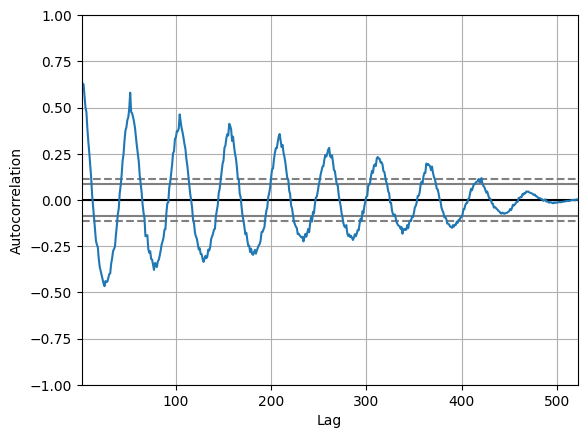

In [ ]:
pd.plotting.autocorrelation_plot(df)

In [ ]:
mean = df['Cases'].mean()
variance = df['Cases'].var()
print('Media:', mean)
print('Varianza:', variance)

Media: 101.24521072796935
Varianza: 5830.066435752054


In [ ]:
# Calcular la varianza en diferentes partes y revisar si tiende a ser constante
var_1 = np.var(df[:100])
var_2 = np.var(df[100:200])
var_3 = np.var(df[200:300])
var_4 = np.var(df[300:400])
var_4 = np.var(df[400:])

In [ ]:
print("La varianza en la primera parte es:", var_1)
print("La varianza en la segunda parte es:", var_2)
print("La varianza en la tercera parte es:", var_3)
print("La varianza en la cuarta parte es:", var_4)

La varianza en la primera parte es: Cases    5854.1836
dtype: float64
La varianza en la segunda parte es: Cases    7852.3859
dtype: float64
La varianza en la tercera parte es: Cases    4931.69
dtype: float64
La varianza en la cuarta parte es: Cases    5112.144047
dtype: float64


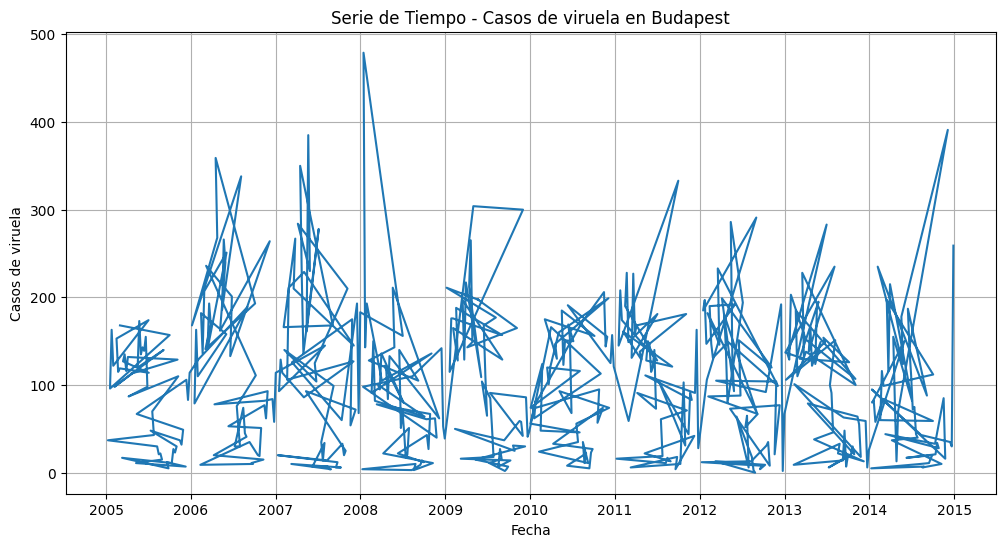

In [ ]:
# Graficar la serie temporal de ruido blanco
plt.figure(figsize=(12, 6))
plt.plot(  df['Cases'])
plt.title('Serie de Tiempo - Casos de viruela en Budapest')
plt.xlabel('Fecha')
plt.ylabel('Casos de viruela')
plt.grid(True)
plt.show()

###***ACF***
----
>La ACF proporciona información sobre la dependencia lineal de una observación en relación con las observaciones anteriores en diferentes intervalos de tiempo.

>La función de autocorrelación se calcula mediante la correlación entre la serie de tiempo original y una versión retrasada de sí misma. Para cada lag o desplazamiento en el tiempo, se calcula el coeficiente de correlación entre los valores actuales de la serie y los valores retrasados.

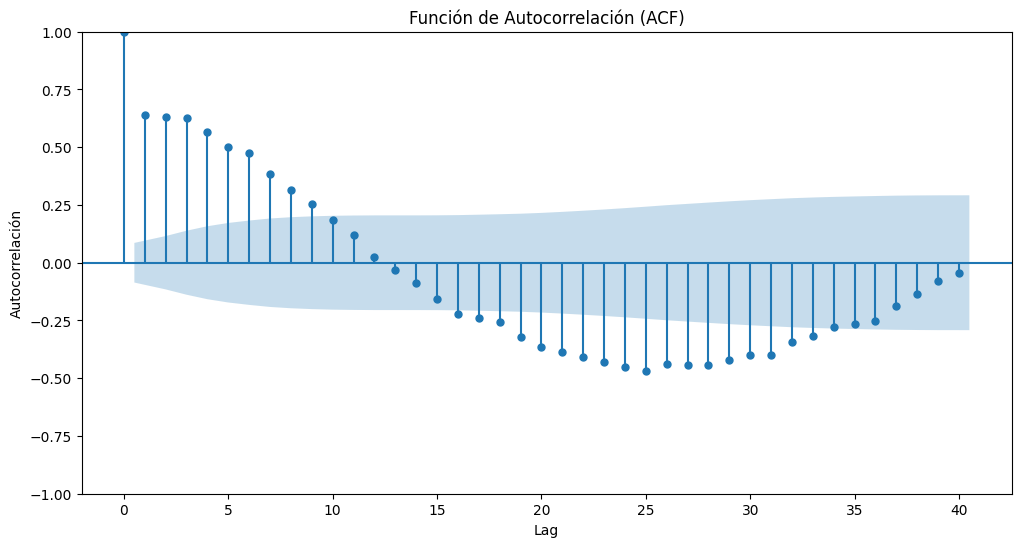

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df['Cases'], lags=40, ax=ax)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelación')
plt.show()

###***PACF***
----
>* Al graficar la PACF, se pueden identificar los patrones o picos significativos en los valores de autocorrelación parcial. Estos patrones pueden ayudar a identificar los efectos directos y únicos de los lags anteriores en los valores actuales de la serie de tiempo, sin la influencia de los lags intermedios.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


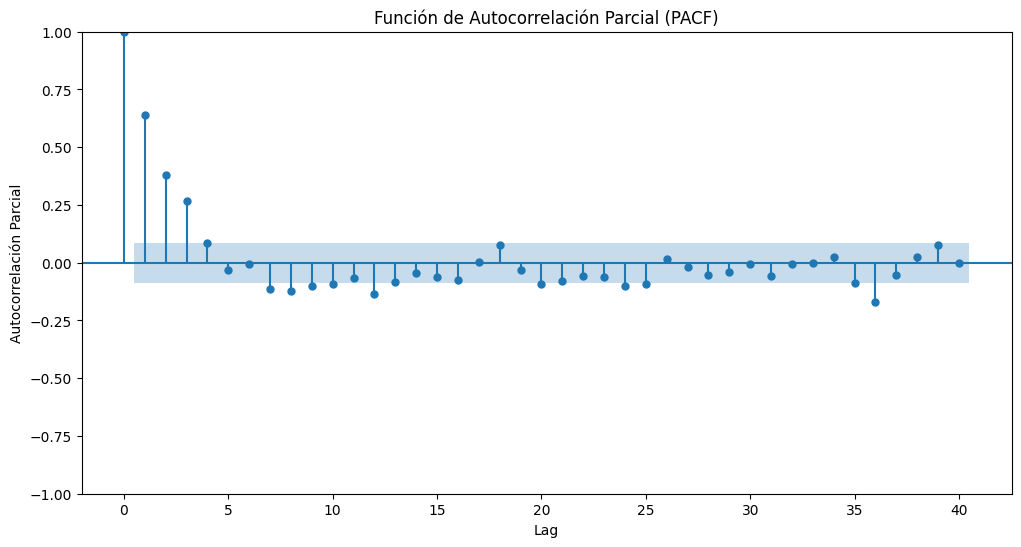

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(df['Cases'], lags=40, ax=ax)
plt.title('Función de Autocorrelación Parcial (PACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelación Parcial')
plt.show()

>**6.** Determinar si la serie es estacionaria
----
>- Dado que el valor p es significativamente menor que el nivel de significancia comúnmente utilizado (por ejemplo, 0.05)

>- Podemos rechazar la hipótesis nula de que la serie de tiempo tiene raíces unitarias y concluir que la serie de tiempo es estacionaria.

>- Esto implica que la serie de tiempo no muestra ninguna tendencia o patrón sistemático y tiene una media y una varianza constantes en todo el período.

>- **Basado en los resultados de la prueba ADF, se puede afirmar que la serie de tiempo es estacionaria.**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Realizar la prueba de Dickey-Fuller Aumentada (ADF)
result = adfuller(df['Cases'])
print('Estadísticas de la prueba ADF:')
print('ADF Statistic:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print(key, ':', value)

Estadísticas de la prueba ADF:
ADF Statistic: -6.9332180147467115
Valor p: 1.0708269234620892e-09
Valores críticos:
1% : -3.443262740636999
5% : -2.8672350350046787
10% : -2.569803239025633


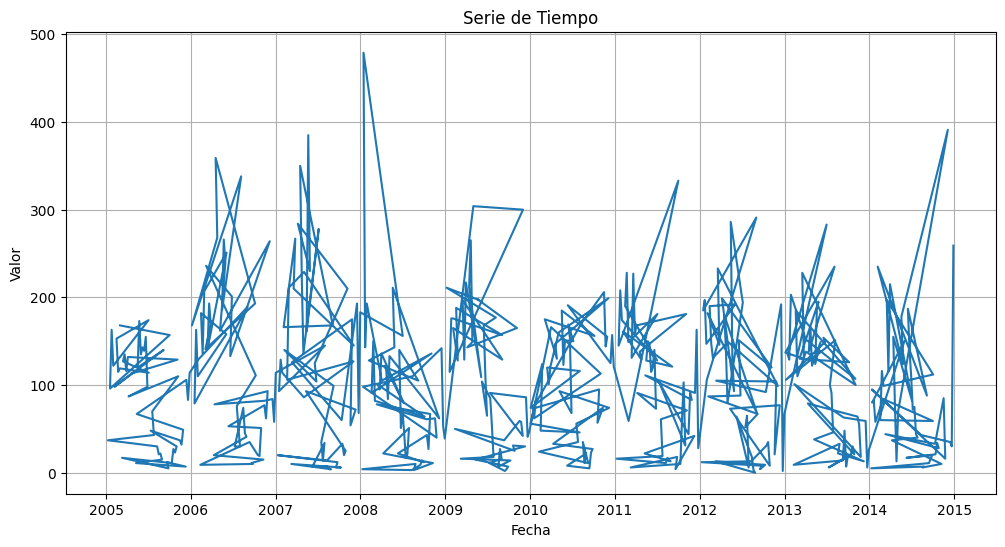

In [ ]:
# Visualizar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df['Cases'])
plt.title('Serie de Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

In [ ]:
# Se realiza un análisis de autocorrelaciones
autocorr = df['Cases'].autocorr()
print('Autocorrelación:', autocorr)

Autocorrelación: 0.6405094570119396


>**7.** Realizar una regresión polinomial para modelar la temporalidad **(Seasonality)** y si es el caso, la tendencia.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
ts

,BUDAPEST
Date,
2005-03-01,168
2005-10-01,157
2005-01-17,96
2005-01-24,163
2005-01-31,122
...,...
2014-01-12,95
2014-08-12,43
2014-12-15,35


In [ ]:
x = np.arange(0,522,1)

In [ ]:
y = ts.values

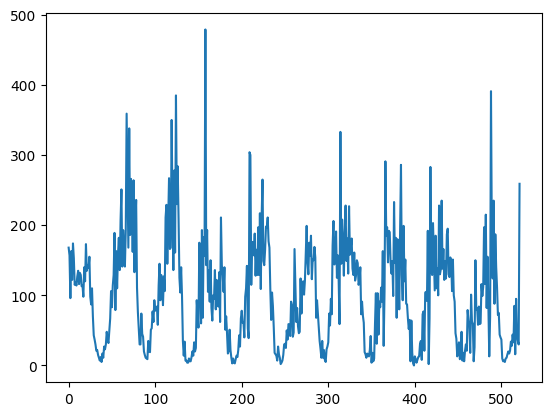

In [ ]:
plt.plot(x, y)

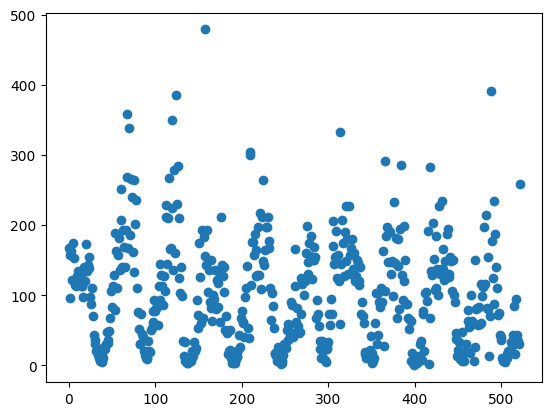

In [ ]:
plt.scatter(x,y)

##***Regresion Polinomial***
-----

In [ ]:
# Regresion con polinomio de grado 2
polinomial = PolynomialFeatures(degree = 2)

In [ ]:
new_x = polinomial.fit_transform(x.reshape(-1,1))

In [ ]:
model_pol = LinearRegression()

In [ ]:
model_pol.fit(new_x , y)

LinearRegression()

In [ ]:
lineal_polinomial = model_pol.predict(new_x)

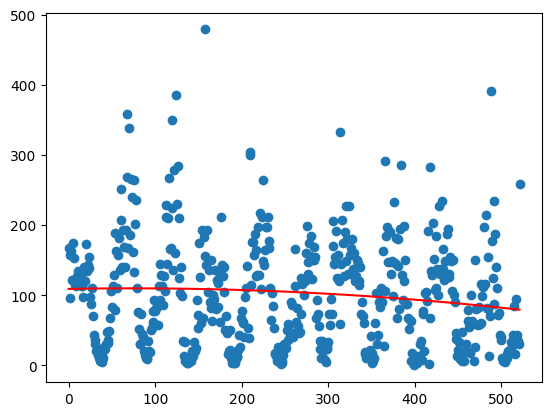

In [ ]:
plt.scatter(x,y)
plt.plot(x,lineal_polinomial,color='red')

##***Seasonality***
----

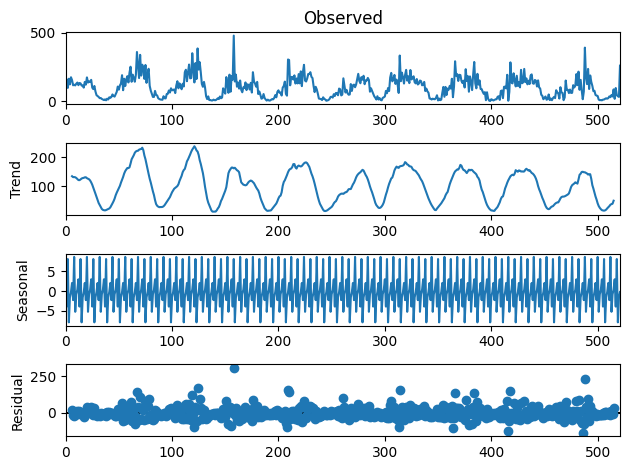

In [ ]:
seasonal_decompose(y, period=12).plot()
plt.show()

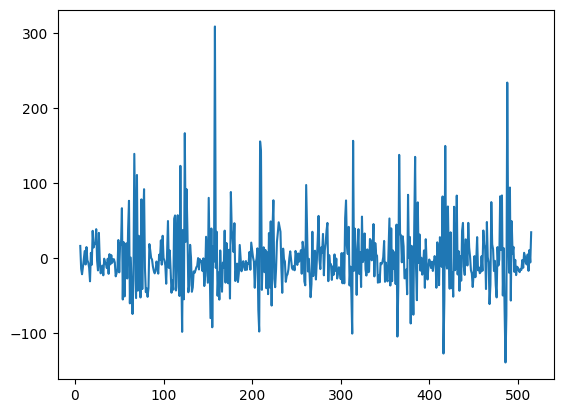

In [ ]:
plt.plot(seasonal_decompose(y,period = 12).resid)